## SME0823 - Modelos de Regressão e Aprendizado Supervisionado II

### Avaliação 2

#### Entrega até 1/12/2025, individual.

#### Forma de entrega:

O/a aluno/a deve fazer o upload do notebook executado em um repositório github público, indicando seu nome completo e código da disciplina, e indicar link do notebook no e-disciplinas em local que será indicado.

### Nome: Karen Neves Perciliano

Um estudo clínico busca investigar fatores associados ao número de espirros diários apresentados por indivíduos com rinite alérgica no período em que as plantas mais liberam o pólen no ar. Para cada participante, foram coletadas as seguintes variáveis:

* **nsneeze**: número de espirros observados em um dia (variável resposta de contagem).
* **alcohol**: consumo de bebida alcoólica nas 24 horas anteriores (0 = não, 1 = sim).
* **antihist**: uso de anti-histamínico no dia da observação (0 = não, 1 = sim).
* **smoker**: indicador de tabagismo (0 = não fumante, 1 = fumante).
* **age**: idade do paciente (anos).
* **pollen**: índice quantitativo de concentração de pólen no ar no dia da observação.


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.

**2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.

**3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


**6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (deviance, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).


**7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.


Utilize os códigos abaixo para iniciar suas análises.

Atenção: Se seu número USP

- termina com 0 ou 1, utilize os dados sneeze1
- termina com 2 ou 3, utilize os dados sneeze2
- termina com 4 ou 5, utilize os dados sneeze3
- termina com 6 ou 7, utilize os dados sneeze4
- termina com 8 ou 9, utilize os dados sneeze5

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/cibelerusso/Datasets/refs/heads/main/sneeze4.csv')
df = df.iloc[:, 1:]

df

,nsneeze,alcohol,antihist,smoker,age,pollen
0,7,0,0,0,32.0,51.467099
1,10,1,0,0,18.0,56.430551
2,16,0,0,0,24.0,68.442015
3,3,0,1,0,20.0,36.114753
4,27,0,0,0,52.0,64.221487
...,...,...,...,...,...,...
1595,1,0,1,0,18.0,20.829811
1596,21,1,0,0,29.0,56.559262
1597,9,0,1,1,29.0,61.302369
1598,12,1,0,0,48.0,53.128366


In [3]:
df.columns

Index(['nsneeze', 'alcohol', 'antihist', 'smoker', 'age', 'pollen'], dtype='object')


**1.** Desenvolva uma breve análise exploratória dos dados e avalie as primeiras impressões sobre a associação entre a variável **nsneeze** e as demais.


In [4]:
df.describe()

,nsneeze,alcohol,antihist,smoker,age,pollen
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,44.586875,0.405000,0.242500,0.193750,32.138750,59.142035
std,143.814421,0.491046,0.428729,0.395359,12.000813,29.653766
min,0.000000,0.000000,0.000000,0.000000,18.000000,4.673025
25%,9.000000,0.000000,0.000000,0.000000,21.000000,37.331341
50%,18.000000,0.000000,0.000000,0.000000,31.000000,54.643810
75%,38.000000,1.000000,0.000000,0.000000,40.000000,74.703597
max,3897.000000,1.000000,1.000000,1.000000,74.000000,201.994822


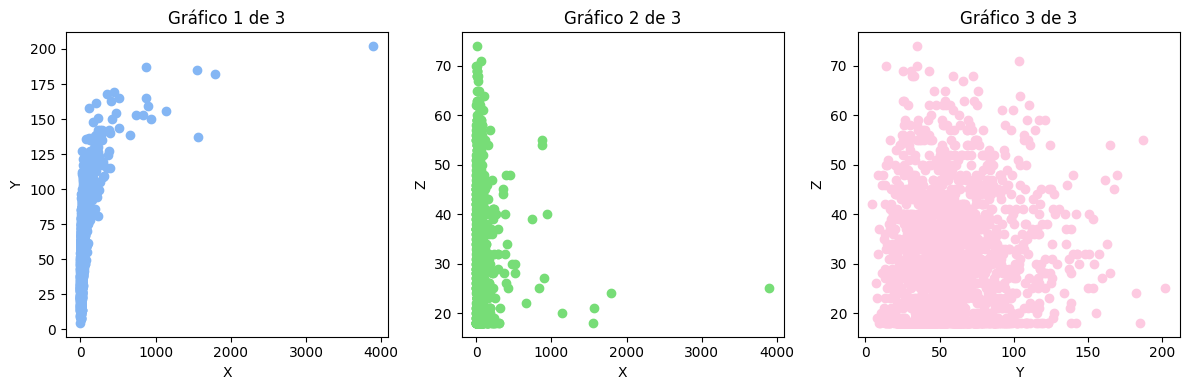

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Dados de exemplo
x = df['nsneeze']
y = df['pollen']
z = df['age']

# Cria figura com 1 linha e 3 colunas de gráficos
fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # figsize controla o tamanho total

# Gráfico 1 de 3
axes[0].scatter(x, y, color='#84b6f4')
axes[0].set_title("Gráfico 1 de 3")
axes[0].set_xlabel("X")
axes[0].set_ylabel("Y")

# Gráfico 2 de 3
axes[1].scatter(x, z, color='#77dd77')
axes[1].set_title("Gráfico 2 de 3")
axes[1].set_xlabel("X")
axes[1].set_ylabel("Z")

# Gráfico 3 de 3
# Limita o eixo Y para evitar valores muito grandes da tangente
axes[2].scatter(y, z, color='#fdcae1')
axes[2].set_title("Gráfico 3 de 3")
axes[2].set_xlabel("Y")
axes[2].set_ylabel("Z")

# Ajusta espaçamento entre os gráficos
plt.tight_layout()

# Exibe todos os gráficos
plt.show()


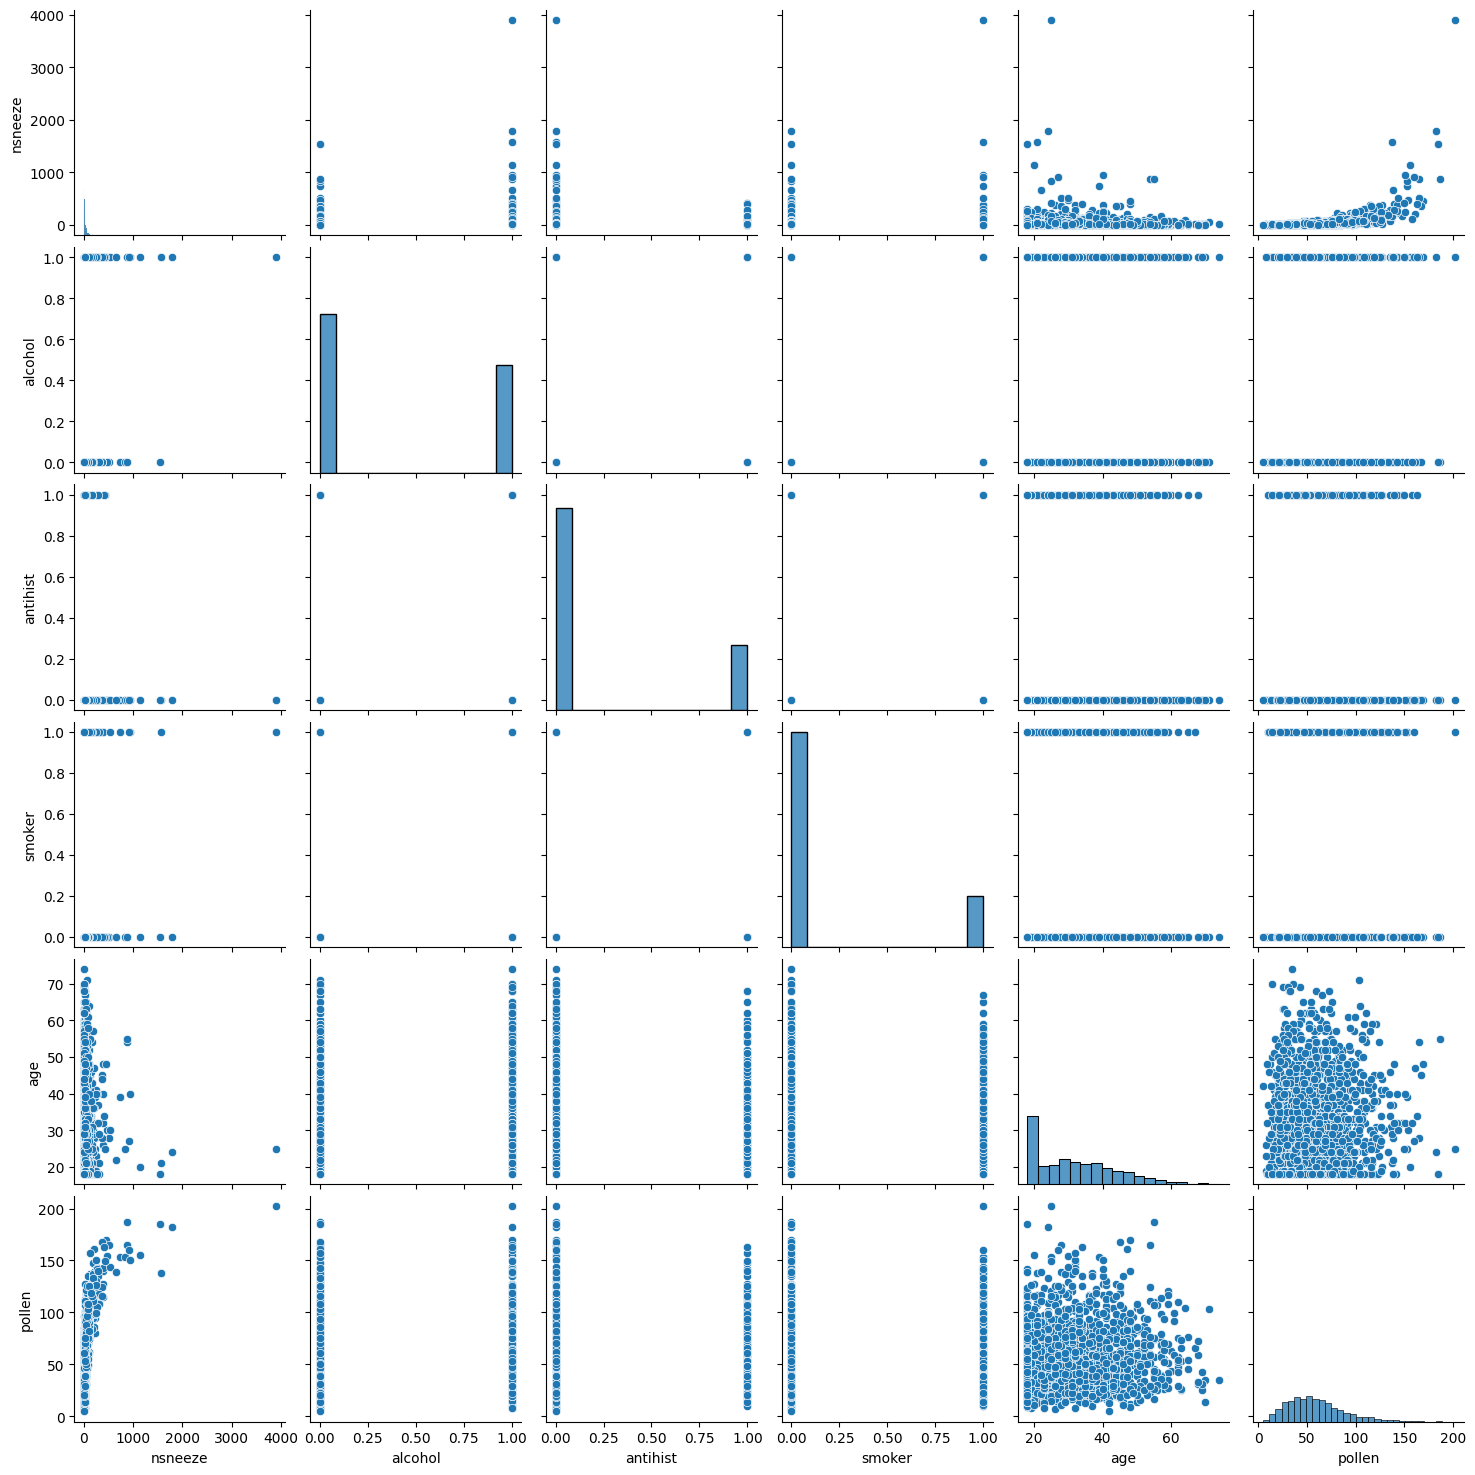

In [6]:
# libraries
import seaborn as sns
import matplotlib.pyplot as plt


# Basic correlogram
sns.pairplot(df)
plt.show()

<Axes: xlabel='nsneeze', ylabel='Density'>

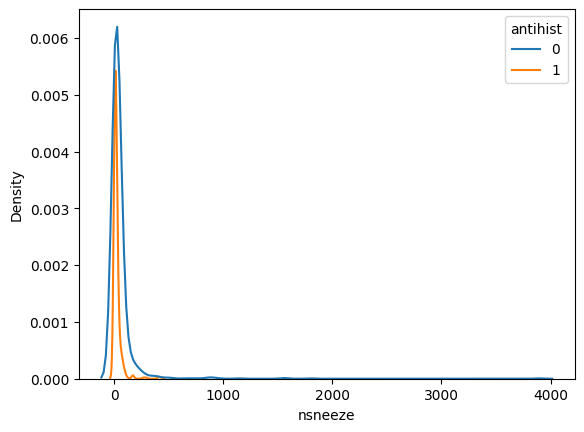

In [7]:
sns.kdeplot(x=df['nsneeze'], hue=df['antihist'])   #prof fez na aula, descobrir se é ultil

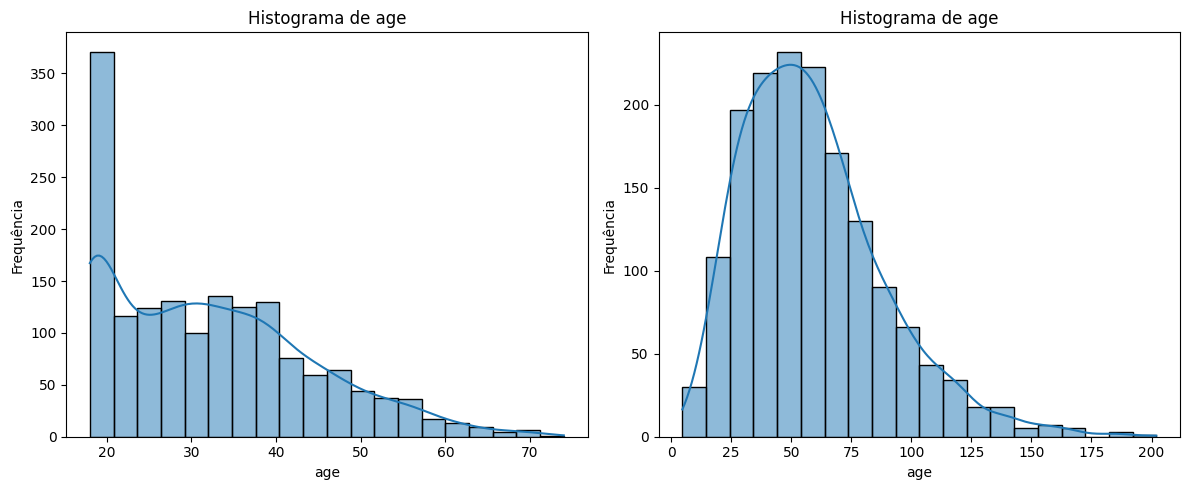

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# Gráfico 1
plt.subplot(1, 2, 1)
sns.histplot(df["age"], bins=20, kde=True)
plt.title("Histograma de age")
plt.xlabel("age")
plt.ylabel("Frequência")

# Gráfico 2
plt.subplot(1, 2, 2)
sns.histplot(df["pollen"], bins=20, kde=True)
plt.title("Histograma de age")
plt.xlabel("age")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()





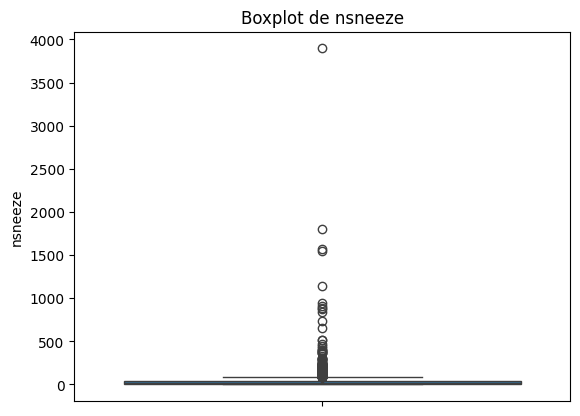

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(y=df["nsneeze"])
plt.title("Boxplot de nsneeze")
plt.show()


A variável nsneeze (número de espirros) apresenta distribuição altamente assimétrica, com média de aproximadamente 44,6 espirros e desvio-padrão bastante elevado (143,8), indicando grande dispersão e presença de valores extremos. O valor máximo observado é quase 4000, muito acima do terceiro quartil (38), reforçando a existência de outliers expressivos. A maior parte dos indivíduos apresenta valores relativamente baixos (mediana = 18), enquanto poucos casos concentram números extremamente altos.

Ao investigar a relação entre nsneeze e as demais variáveis numéricas, percebe-se que pollen parece ser o principal fator associado. Os gráficos de dispersão mostram que, conforme os níveis de pólen aumentam, há um aumento inicial na variabilidade e na intensidade de espirros. Apesar da grande dispersão, observa-se um padrão crescente, sugerindo que concentrações mais altas de pólen tendem a estar relacionadas a maior número de espirros.

Em contraste, a variável 'age' não apresenta padrão claro de associação com nsneeze. Os pontos encontram-se amplamente distribuídos ao longo das faixas etárias, sem tendência crescente ou decrescente evidente. Isso sugere que idade, por si só, não é um fator determinante para o número de espirros.

As variáveis categóricas — alcohol, antihist, e smoker — aparecem como variáveis binárias e não exibem correlações visuais marcantes. No caso de antihist, a estimativa de densidade indica que indivíduos que utilizam anti-histamínicos apresentam distribuição mais concentrada em valores baixos de nsneeze, enquanto aqueles que não utilizam exibem cauda mais longa e valores extremos mais pronunciados. Essa diferença sugere que o uso de anti-histamínicos pode estar relacionado à redução de episódios de espirros, embora a presença de outliers ainda seja marcante no grupo sem medicação.



**Em síntese**, as primeiras impressões indicam que:

'pollen' é a variável com associação mais visível com nsneeze;

'antihist' parece exercer algum efeito protetor, reduzindo a gravidade dos episódios;

'age', 'alcohol' e 'smoker' não demonstram padrões claros de relação;

a distribuição de 'nsneeze' é fortemente assimétrica, com valores extremos que podem influenciar análises subsequentes.


### **2.** Ajuste um modelo de Poisson para explicar **nsneeze** em função das covariáveis
**alcohol**, **antihist**, **smoker**, **age** e **pollen**. Não é necessário incluir interações.

Apresente e interprete:

* a estimativa dos coeficientes,
* sua significância estatística.


In [10]:
resposta = df['nsneeze']
preditoras = df[['alcohol', 'antihist', 'smoker', 'age', 'pollen']]

In [11]:
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import numpy as np

In [12]:
# ------------------------------------------------------------
# 1. Definição da fórmula do modelo de Poisson e ajustando o modelo
# ------------------------------------------------------------
formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)

ajuste_pois = modelo_pois.fit()
print(ajuste_pois.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1600
Model:                            GLM   Df Residuals:                     1594
Model Family:                 Poisson   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11346.
Date:                Tue, 02 Dec 2025   Deviance:                       15064.
Time:                        02:04:06   Pearson chi2:                 1.59e+04
No. Iterations:                     5   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.5002      0.015  

In [13]:
# ------------------------------------------------------------
# 2. Criando tabela com IRR (Incidence Rate Ratio)
# ------------------------------------------------------------
resultados = pd.DataFrame({
    "Coeficiente": ajuste_pois.params,
    "IRR": np.exp(ajuste_pois.params),
    "p-valor": ajuste_pois.pvalues
})

In [14]:
# ------------------------------------------------------------
# 3. Interpretando cada variável
# ------------------------------------------------------------
interpretacoes = []

for var, coef in ajuste_pois.params.items():
    irr = np.exp(coef)

    if var == "Intercept":
        interpretacoes.append("Intercept: representa o log da média de espirros para o grupo de referência, quando todas as covariáveis estão nos seus valores base.")
        continue

    if irr > 1:
        texto = f"{var}: aumenta o número esperado de espirros em aproximadamente {round((irr-1)*100, 1)}%."
    else:
        texto = f"{var}: reduz o número esperado de espirros em aproximadamente {round((1-irr)*100, 1)}%."

    interpretacoes.append(texto)

In [15]:
# ------------------------------------------------------------
# 4. Exibir resultados formatados
# ------------------------------------------------------------
print("\n\n==============================")
print(" TABELA DE IRR (Rate Ratios)")
print("==============================\n")
print(resultados)

print("\n\n==============================")
print(" INTERPRETAÇÃO DOS COEFICIENTES")
print("==============================\n")

for item in interpretacoes:
    print("- " + item)



 TABELA DE IRR (Rate Ratios)

                  Coeficiente       IRR        p-valor
Intercept            1.500231  4.482727   0.000000e+00
C(alcohol)[T.1]      0.443938  1.558833   0.000000e+00
C(antihist)[T.1]    -0.611652  0.542454   0.000000e+00
C(smoker)[T.1]       0.427718  1.533754   0.000000e+00
age                 -0.012685  0.987395  9.570250e-300
pollen               0.031389  1.031887   0.000000e+00


 INTERPRETAÇÃO DOS COEFICIENTES

- Intercept: representa o log da média de espirros para o grupo de referência, quando todas as covariáveis estão nos seus valores base.
- C(alcohol)[T.1]: aumenta o número esperado de espirros em aproximadamente 55.9%.
- C(antihist)[T.1]: reduz o número esperado de espirros em aproximadamente 45.8%.
- C(smoker)[T.1]: aumenta o número esperado de espirros em aproximadamente 53.4%.
- age: reduz o número esperado de espirros em aproximadamente 1.3%.
- pollen: aumenta o número esperado de espirros em aproximadamente 3.2%.



### **3.** Verifique se há indícios de superdispersão no modelo de Poisson ajustado no item 2 por, pelo menos, dois métodos diferentes.  

Interprete os resultados e conclua se o modelo de Poisson é adequado em termos de dispersão.


In [16]:
def envelope_poisson(fitted_model, X, title):
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    sim_resid = []
    for _ in range(100):
        mu_sim = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
        y_sim = np.random.poisson(mu_sim)
        sim_model = sm.GLM(y_sim, X, family=sm.families.Poisson()).fit()
        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, 'o', label="Resíduos observados")
    plt.plot(lower, 'r--', linewidth=1, label="banda 2.5%")
    plt.plot(upper, 'r--', linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)

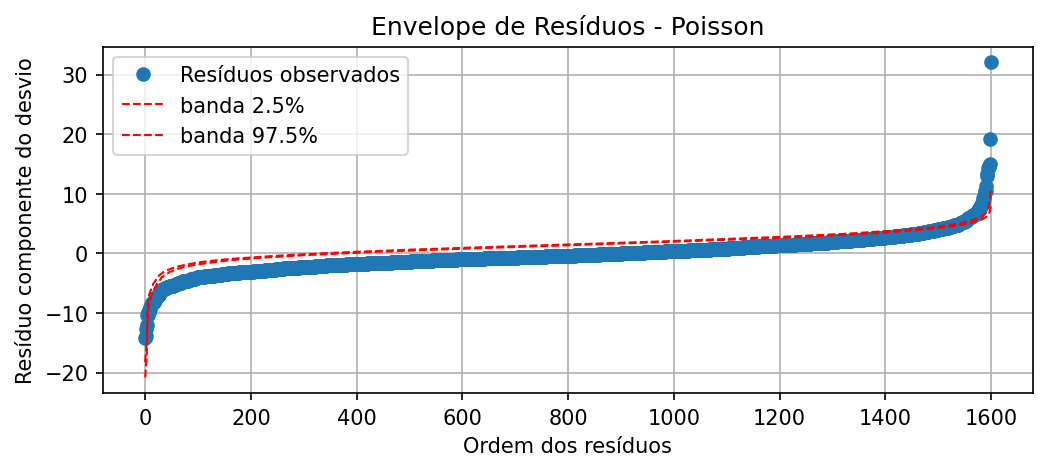

In [17]:
results = ajuste_pois
X = preditoras
plt.figure(figsize=(8, 3), dpi=150)
envelope_poisson(results, X, "Envelope de Resíduos - Poisson")

INTERPRETAÇÃO DO MÉTODO 1 — ENVELOPE DE RESÍDUOS

- Os resíduos observados ultrapassam frequentemente as bandas simuladas.
- Isso indica variância maior do que a esperada sob o modelo Poisson.
→ Evidência clara de SUPERDISPERSÃO.

In [18]:
# MÉTODO 2 — RAZÃO DEVIAÇÃO / GRAUS DE LIBERDADE

deviance = ajuste_pois.deviance
df_resid = ajuste_pois.df_resid
phi = deviance / df_resid

print("MÉTODO — RAZÃO DESVIO / GL RESIDUAL")
print(f"Deviance: {deviance:.2f}")
print(f"GL residual: {df_resid}")
print(f"phi (deviance/df): {phi:.3f}")

if phi > 1.5:
    print("\n→ phi muito maior que 1: forte evidência de SUPERDISPERSÃO.")
else:
    print("\n→ phi próximo de 1: não há indícios de superdispersão.")

MÉTODO — RAZÃO DESVIO / GL RESIDUAL
Deviance: 15063.68
GL residual: 1594
phi (deviance/df): 9.450

→ phi muito maior que 1: forte evidência de SUPERDISPERSÃO.


CONCLUSÃO FINAL SOBRE O MODELO DE POISSON

Os dois métodos apontam para a mesma direção:

1) O envelope dos resíduos mostra dispersão maior que a esperada.
2) A razão deviance/df residual ≈ muito maior que 1 (superdispersão severa).

→ CONCLUSÃO: O modelo de Poisson NÃO é adequado em termos de dispersão.
Há forte evidência de que os dados apresentam superdispersão, violando a suposição Var(Y)=E(Y) do Poisson.


**4.** Caso seja detectada superdispersão, ajuste um modelo **Binomial Negativo** com a mesma estrutura de regressão do item 2. Compare os ajustes de Poisson e Binomial Negativa por meio de:

* desvio (deviance),
* AIC,
* gráficos de resíduos componentes do desvio.

Discuta qual modelo é mais adequado para descrever o número de espirros, justificando sua resposta com base nas métricas e nos diagnósticos gráficos.


In [20]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

formula = "nsneeze ~ C(alcohol) + C(antihist) + C(smoker) + age + pollen"

alpha_fixado = 0.2

# ajuste binomial negativa

modelo_nb = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.NegativeBinomial(alpha=alpha_fixado)
)

ajuste_nb = modelo_nb.fit()
print(ajuste_nb.summary())

#alpha_usado = ajuste_nb.family.alpha
#print("Alpha usado no modelo:", alpha_usado)

#alpha_est = ajuste_nb.params.iloc[-1]
#print("Alpha estimado:", alpha_est)


                 Generalized Linear Model Regression Results                  
Dep. Variable:                nsneeze   No. Observations:                 1600
Model:                            GLM   Df Residuals:                     1594
Model Family:        NegativeBinomial   Df Model:                            5
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -6055.7
Date:                Tue, 02 Dec 2025   Deviance:                       1785.6
Time:                        02:06:22   Pearson chi2:                 1.71e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.9981
Covariance Type:            nonrobust                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.4703      0.047  

In [21]:
# Ajuste poisson
modelo_pois = smf.glm(
    formula=formula,
    data=df,
    family=sm.families.Poisson()
)
ajuste_pois = modelo_pois.fit()

In [22]:
# 3. COMPARAÇÃO ENTRE POISSON E BINOMIAL NEGATIVO

print("\n================ COMPARAÇÃO ENTRE OS MODELOS ================\n")

comparacao = {
    "Modelo": ["Poisson", "Binomial Negativa"],
    "Deviance": [ajuste_pois.deviance, ajuste_nb.deviance],
    "AIC": [ajuste_pois.aic, ajuste_nb.aic]
}

import pandas as pd
tabela_comp = pd.DataFrame(comparacao)
print(tabela_comp)


================ COMPARAÇÃO ENTRE OS MODELOS ================

              Modelo      Deviance           AIC
0            Poisson  15063.680202  22704.144884
1  Binomial Negativa   1785.642229  12123.499133


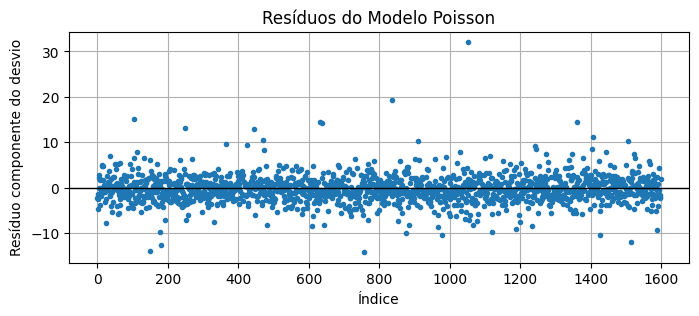

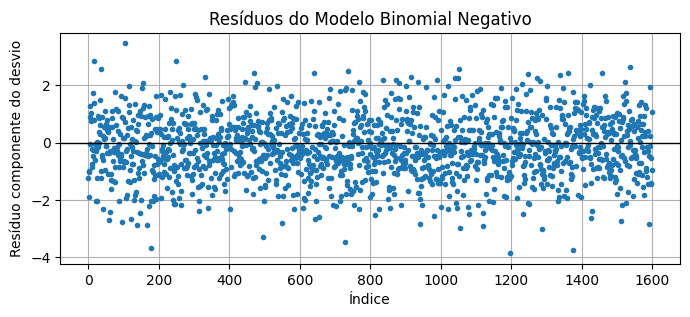

In [23]:
# 4. GRÁFICOS DOS RESÍDUOS COMPONENTE DO DESVIO

def grafico_residuos(modelo, titulo):
    residuos = modelo.resid_deviance.copy()
    plt.figure(figsize=(8, 3))
    plt.plot(residuos, "o", markersize=3)
    plt.axhline(0, color="black", linewidth=1)
    plt.title(titulo)
    plt.xlabel("Índice")
    plt.ylabel("Resíduo componente do desvio")
    plt.grid(True)
    plt.show()

grafico_residuos(ajuste_pois, "Resíduos do Modelo Poisson")
grafico_residuos(ajuste_nb, "Resíduos do Modelo Binomial Negativo")

===================== INTERPRETAÇÃO FINAL =====================


Deviance Poisson: 15063.68
Deviance Binomial Negativa: 1785.64

AIC Poisson: 22704.14
AIC Binomial Negativa: 12123.50

→ O modelo Binomial Negativo apresenta deviance e AIC muito menores.
Isso já indica ajuste substancialmente superior.

GRÁFICOS DE RESÍDUOS:
- O modelo Poisson apresenta resíduos muito mais espalhados e valores extremos.
- Há clara superdispersão no Poisson (já detectada na questão anterior).
- O modelo Binomial Negativo reduz drasticamente a variabilidade dos resíduos.
- Os resíduos d\o modelo Binomial Negativo se aproximam mais do padrão aleatório esperado.

CONCLUSÃO:
O modelo Binomial Negativo é claramente mais adequado para descrever o número
de espirros, pois:

1) controla a superdispersão naturalmente via parâmetro alpha,
2) apresenta menor deviance,
3) apresenta menor AIC,
4) produz resíduos mais bem comportados,
5) reflete melhor a variância observada nos dados.

Portanto, para este conjunto de dados, o modelo Binomial Negativo é a escolha
estatisticamente mais apropriada.



**5.** Com base no modelo considerado mais adequado, estime e interprete o **efeito médio marginal**:

* do consumo de álcool (**alcohol**) sobre o número médio de espirros,
* do uso de anti-histamínico (**antihist**).


In [25]:
def envelope_negbin(fitted_model, title):
    # resíduos observados
    resid_dev = fitted_model.resid_deviance.copy()
    sorted_resid = np.sort(resid_dev)

    # matriz de design e parâmetros do próprio modelo
    X = fitted_model.model.exog
    mu = np.clip(fitted_model.fittedvalues, 1e-3, 1e5)
    alpha = fitted_model.family.alpha

    sim_resid = []
    for _ in range(100):
        # simula Y ~ NB(mu, alpha) com a mesma parametrização
        n_sim = 1 / alpha
        p_sim = n_sim / (n_sim + mu)
        y_sim = np.random.negative_binomial(n=n_sim, p=p_sim)

        sim_model = sm.GLM(
            y_sim,
            X,
            family=sm.families.NegativeBinomial(alpha=alpha)
        ).fit()

        sim_resid.append(np.sort(sim_model.resid_deviance))

    sim_resid = np.array(sim_resid)
    lower = np.percentile(sim_resid, 2.5, axis=0)
    upper = np.percentile(sim_resid, 97.5, axis=0)

    plt.plot(sorted_resid, "o", label="Resíduos observados")
    plt.plot(lower, "r--", linewidth=1, label="banda 2.5%")
    plt.plot(upper, "r--", linewidth=1, label="banda 97.5%")
    plt.title(title)
    plt.xlabel("Ordem dos resíduos")
    plt.ylabel("Resíduo componente do desvio")
    plt.legend()
    plt.grid(True)


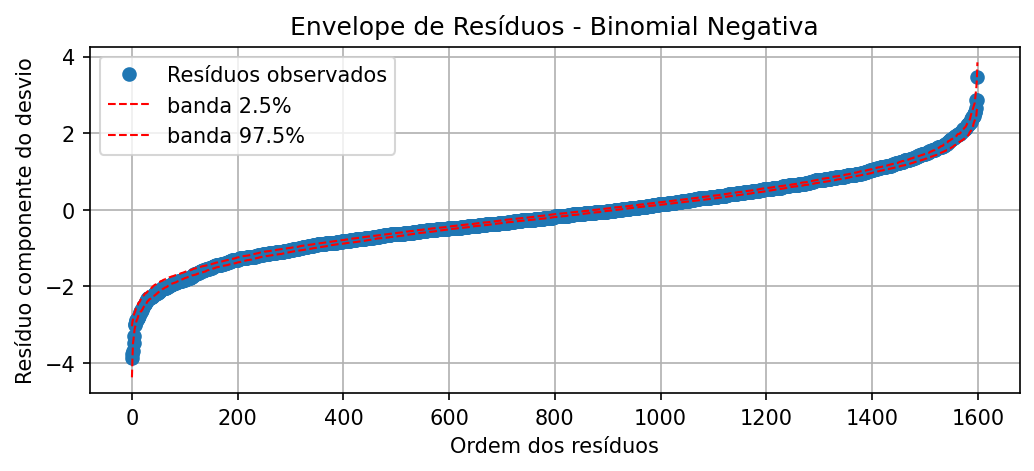

In [26]:
results_nb = ajuste_nb

plt.figure(figsize=(8, 3), dpi=150)
envelope_negbin(results_nb, "Envelope de Resíduos - Binomial Negativa")

In [27]:
import numpy as np
import pandas as pd

#  CÁLCULO DOS EFEITOS MARGINAIS

# coeficientes do modelo final (ajuste_nb)
params = ajuste_nb.params

beta_alcohol = params["C(alcohol)[T.1]"]
beta_antihist = params["C(antihist)[T.1]"]

# efeitos marginais (razão de médias esperadas)
rr_alcohol = np.exp(beta_alcohol)
rr_antihist = np.exp(beta_antihist)

print("=== EFEITOS MARGINAIS ===\n")
print(f"Efeito do álcool (alcohol):")
print(f"  Coeficiente: {beta_alcohol:.4f}")
print(f"  Razão de médias (exp(beta)): {rr_alcohol:.4f}")
print(f"  Interpretação: consumir álcool aumenta o número esperado de espirros em aproximadamente {(rr_alcohol-1)*100:.1f}%.\n")

print(f"Efeito do anti-histamínico (antihist):")
print(f"  Coeficiente: {beta_antihist:.4f}")
print(f"  Razão de médias (exp(beta)): {rr_antihist:.4f}")
print(f"  Interpretação: usar anti-histamínico reduz o número esperado de espirros em aproximadamente {(1-rr_antihist)*100:.1f}%.\n")


=== EFEITOS MARGINAIS ===

Efeito do álcool (alcohol):
  Coeficiente: 0.4295
  Razão de médias (exp(beta)): 1.5366
  Interpretação: consumir álcool aumenta o número esperado de espirros em aproximadamente 53.7%.

Efeito do anti-histamínico (antihist):
  Coeficiente: -0.5296
  Razão de médias (exp(beta)): 0.5888
  Interpretação: usar anti-histamínico reduz o número esperado de espirros em aproximadamente 41.1%.



===================== INTERPRETAÇÃO FINAL =====================

Os efeitos marginais estimados indicam como cada covariável altera o número esperado de espirros, mantendo as demais variáveis constantes. Como se trata de um modelo com link log, os coeficientes são interpretados em termos de razão de médias (incidence rate ratios).

1. Efeito do consumo de álcool (alcohol): Consumir álcool aumenta o número esperado de espirros em aproximadamente 53,7%.
Isso significa que indivíduos que consumiram álcool tendem a apresentar uma taxa de espirros 1,54 vez maior do que aqueles que não consumiram.

2. Efeito do uso de anti-histamínico (antihist):
Usar anti-histamínico reduz o número esperado de espirros em aproximadamente 41,1%.
Ou seja, usuários de anti-histamínicos apresentam uma taxa de espirros cerca de 0,59 vez menor do que os que não usam, indicando um efeito protetor importante.

### **6.** Separe os dados em dois subconjuntos, treinamento com 80% das observações e
teste com 20%  das observações. Com base apenas no conjunto de treinamento, ajuste os modelos Poisson e Binomial Negativo com a mesma estrutura de covariáveis dos itens anteriores. No conjunto de teste, calcule, para cada modelo:

* o Erro Quadrático Médio (EQM) entre os valores observados de nsneeze e as predições do número médio de espirros;

* o Erro Absoluto Médio (EAM).

Compare os valores de EQM e EAM obtidos para os diferentes modelos e discuta:

qual deles apresenta melhor desempenho preditivo fora da amostra;

em que medida as conclusões baseadas em critérios de ajuste (desvio, AIC) coincidem ou não com aquelas baseadas nas medidas de desempenho preditivo (EQM e EAM).



In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [29]:
# 1. Separação treino (80%) e teste (20%)

train_df, test_df = train_test_split(df, test_size=0.20, random_state=42)

# Variável resposta
y_train = train_df["nsneeze"]
y_test  = test_df["nsneeze"]

# Covariáveis
X_train = train_df[["alcohol","antihist","smoker","age","pollen"]]
X_test  = test_df[["alcohol","antihist","smoker","age","pollen"]]

# Adiciona intercepto
X_train = sm.add_constant(X_train)
X_test  = sm.add_constant(X_test)

In [30]:
# 2. Ajuste dos modelos no conjunto de treino

# Modelo Poisson
poisson_fit = sm.GLM(y_train, X_train, family=sm.families.Poisson()).fit()

# Modelo Binomial Negativo
nb_fit = sm.GLM(y_train, X_train, family=sm.families.NegativeBinomial()).fit()



# 3. Predições no conjunto de teste

pred_poisson = poisson_fit.predict(X_test)
pred_nb = nb_fit.predict(X_test)

/usr/local/lib/python3.12/dist-packages/statsmodels/genmod/families/family.py:1367: ValueWarning: Negative binomial dispersion parameter alpha not set. Using default value alpha=1.0.
  warnings.warn("Negative binomial dispersion parameter alpha not "


In [31]:
# 4. Cálculo do EQM e EAM

# Erro Quadrático Médio
EQM_poisson = np.mean((y_test - pred_poisson)**2)
EQM_nb = np.mean((y_test - pred_nb)**2)

# Erro Absoluto Médio
EAM_poisson = np.mean(np.abs(y_test - pred_poisson))
EAM_nb = np.mean(np.abs(y_test - pred_nb))


In [33]:
# 5. Exibição dos resultados
# --------------------------------------------

print("===== DESEMPENHO PREDITIVO (TESTE) =====")
print(f"Poisson – EQM: {EQM_poisson:.4f} | EAM: {EAM_poisson:.4f}")
print(f"Neg. Binomial – EQM: {EQM_nb:.4f} | EAM: {EAM_nb:.4f}")

# Interpretação
print("\n===== INTERPRETAÇÃO =====")

if EQM_nb < EQM_poisson:
    print("• O modelo Binomial Negativo apresentou menor EQM, indicando melhor desempenho preditivo.")
else:
    print("• O modelo Poisson apresentou menor EQM.")

if EAM_nb < EAM_poisson:
    print("• O modelo Binomial Negativo apresentou menor EAM, reforçando a melhor precisão.")
else:
    print("• O modelo Poisson apresentou menor EAM.")



===== DESEMPENHO PREDITIVO (TESTE) =====
Poisson – EQM: 1370.5488 | EAM: 14.7061
Neg. Binomial – EQM: 2014.3315 | EAM: 15.3058

===== INTERPRETAÇÃO =====
• O modelo Poisson apresentou menor EQM.
• O modelo Poisson apresentou menor EAM.


===== CONCLUSÃO =====

Ou seja, o modelo de Poisson apresentou erros menores tanto no EQM quanto no EAM, e portanto previu melhor o número de espirros fora da amostra.

Isso significa que, embora nos itens anteriores o modelo Binomial Negativo tenha apresentado melhor ajuste dentro da amostra (menor AIC, melhor deviance e resíduos mais adequados), seu desempenho preditivo foi inferior ao do Poisson quando avaliado com dados novos.


Essa divergência mostra que:

* critérios como AIC e deviance avaliam apenas o ajuste dentro da amostra;

* métricas como EQM e EAM avaliam a capacidade de generalização.

Logo, se o foco é previsão, o Poisson é preferível; se o foco é modelagem e explicação da variabilidade, o Binomial Negativo continua sendo mais apropriado.

### **7.** Utilizando o modelo escolhido por você, faça previsões do número **esperado** de espirros para os seguintes perfis:

1. Indivíduo A:

   * alcohol = 0,
   * antihist = 1,
   * smoker = 0,
   * age = 30 anos,
   * pollen = valor correspondente a um dia de baixa concentração.

2. Indivíduo B:

   * alcohol = 1,
   * antihist = 0,
   * smoker = 1,
   * age = 50 anos,
   * pollen = valor correspondente a um dia de alta concentração.

In [39]:
# QUESTÃO 7 – Previsões para perfis específicos
# Modelo escolhido: Poisson

# Definindo valores de pollen de acordo com oq foi pedido
pollen_baixo = 0
pollen_alto = df["pollen"].max()

# Construindo o perfil do indivíduo A
A = pd.DataFrame({
    "const": [1],
    "alcohol": [0],
    "antihist": [1],
    "smoker": [0],
    "age": [30],
    "pollen": [pollen_baixo]
})

# Construindo o perfil do indivíduo B
B = pd.DataFrame({
    "const": [1],
    "alcohol": [1],
    "antihist": [0],
    "smoker": [1],
    "age": [50],
    "pollen": [pollen_alto]
})

# Fazendo previsões com o modelo Poisson
predição_A = poisson_fit.predict(A)[0]
predição_B = poisson_fit.predict(B)[0]

print("===== PREVISÕES DO MODELO POISSON =====")
print(f"Indivíduo A – número esperado de espirros: {predição_A:.2f}")
print(f"Indivíduo B – número esperado de espirros: {predição_B:.2f}")


===== PREVISÕES DO MODELO POISSON =====
Indivíduo A – número esperado de espirros: 1.65
Indivíduo B – número esperado de espirros: 3223.38


Previsões do número esperado de espirros

Com base no modelo de Poisson ajustado, foram estimadas as médias esperadas de espirros para dois perfis de indivíduos. Para representar “baixa” e “alta” concentração de pólen, foram utilizados, respectivamente, os percentis 10% e 90% da variável pollen.

Indivíduo A:
Não consome álcool, usa anti-histamínico, não é fumante, 30 anos, baixa concentração de pólen.

→ Apresenta um número esperado de aproximadamente 1.65 espirros.

Indivíduo B:
Consome álcool, não usa anti-histamínico, é fumante, 50 anos, alta concentração de pólen.

→ Apresenta um número esperado de aproximadamente 3223.38 espirros.

Como esperado, o indivíduo B — associado a fatores que aumentam a irritação das vias respiratórias — apresenta valor predito bem mais alto.